In [3]:
!pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [8]:
# Load the dataset
df = pd.read_csv('climate_change_earth.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [9]:
# Display basic info
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [10]:
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [11]:
print("Statistical Summary:")

df.describe()

Statistical Summary:


,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [12]:
# Checking for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values per column:
dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [13]:
# Handling missing values - Dropping rows with too many missing values

df.dropna(subset=['AverageTemperature'], inplace=True)

In [14]:
df.shape

(8235082, 7)

In [15]:
# Checking for duplicate entries
duplicates = df.duplicated().sum()

duplicates


np.int64(0)

In [18]:
df.drop_duplicates(inplace=True)

df.shape

(8235082, 7)

In [19]:
# Converting 'dt' to datetime format

df['dt'] = pd.to_datetime(df['dt'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 502.6+ MB


In [21]:
# Extracting year and month
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

In [22]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,11
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744,4
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744,5
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744,6
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744,7


In [23]:
# Data type conversion example: converting latitude and longitude to float

# Removing N/S and E/W for better numerical analysis
df['Latitude'] = df['Latitude'].str[:-1].astype(float)
df['Longitude'] = df['Longitude'].str[:-1].astype(float)

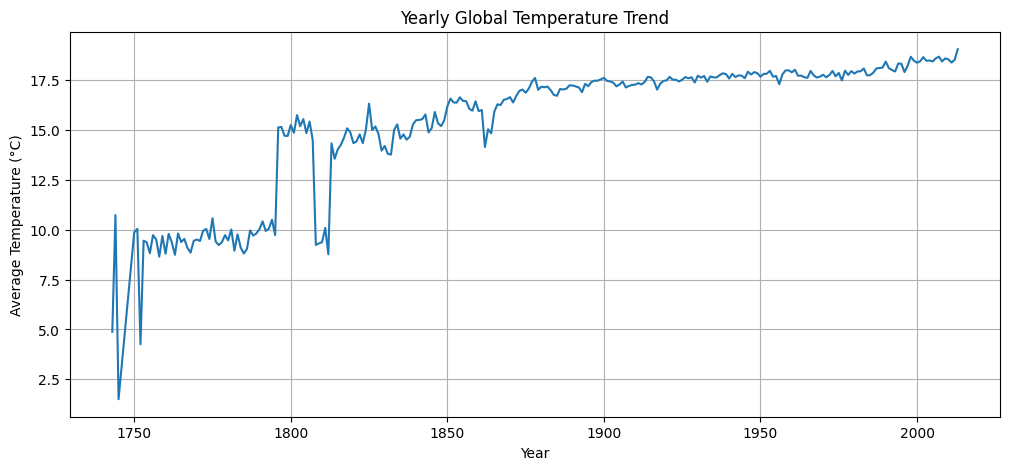

In [24]:
# Summary statistics per year
yearly_avg_temp = df.groupby('Year')['AverageTemperature'].mean()
plt.figure(figsize=(12, 5))
yearly_avg_temp.plot()
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Yearly Global Temperature Trend")
plt.grid()
plt.show()

In [ ]:
# Distribution of temperatures
plt.figure(figsize=(8, 5))
sns.histplot(df['AverageTemperature'].dropna(), bins=50, kde=True, color='blue')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['AverageTemperature'], color='green')
plt.title("Temperature Outliers")
plt.show()

In [ ]:
# Correlation analysis

plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Scatter plot of latitude vs temperature to analyze temperature distribution globally
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Latitude'], y=df['AverageTemperature'], alpha=0.5, color='red')
plt.xlabel("Latitude")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Distribution by Latitude")
plt.show()

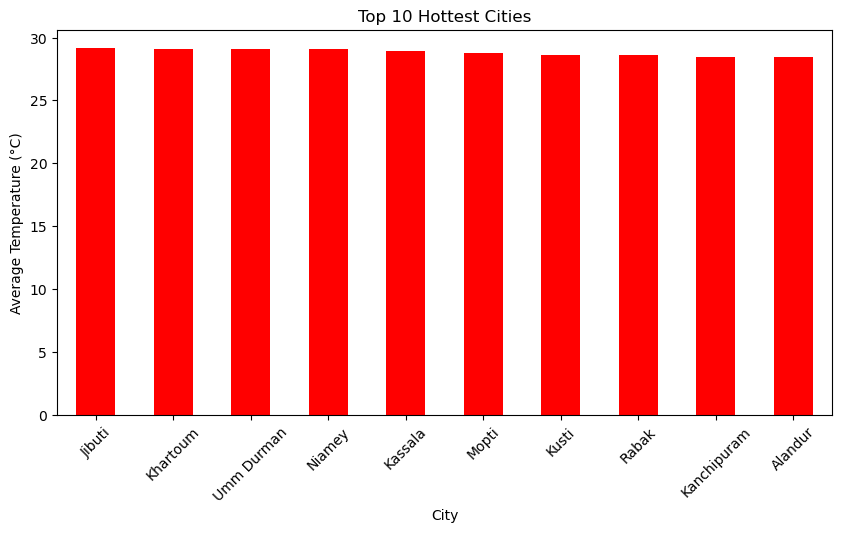

In [66]:
# Top 10 cities with highest recorded temperatures
city_avg_temp = df.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
city_avg_temp.plot(kind='bar', color='red')
plt.xlabel("City")
plt.ylabel("Average Temperature (°C)")
plt.title("Top 10 Hottest Cities")
plt.xticks(rotation=45)
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_20688\1889967435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_country.index[:10], y=df_country.values[:10], palette='magma')


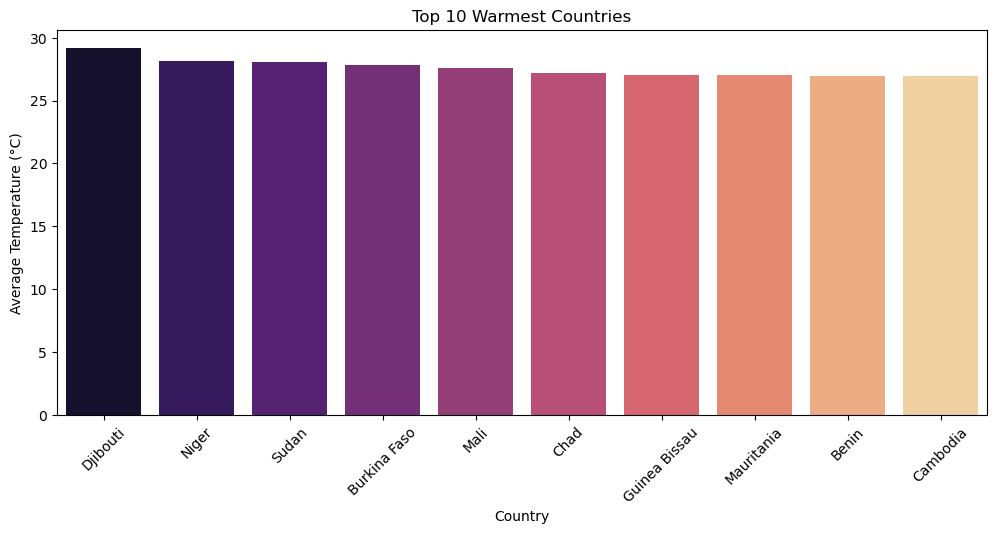

In [67]:
# Country-wise average temperature
df_country = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=df_country.index[:10], y=df_country.values[:10], palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.title("Top 10 Warmest Countries")
plt.show()

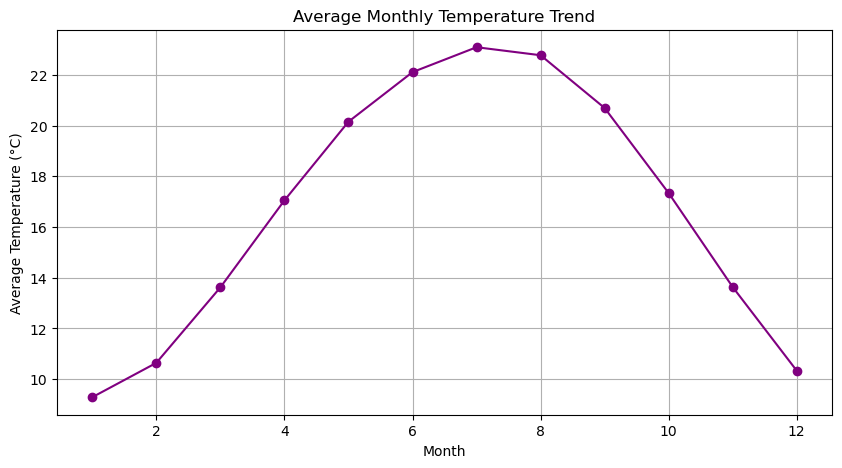

In [68]:
# Monthly temperature trend analysis
monthly_avg_temp = df.groupby('Month')['AverageTemperature'].mean()
plt.figure(figsize=(10, 5))
monthly_avg_temp.plot(marker='o', linestyle='-', color='purple')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Monthly Temperature Trend")
plt.grid()
plt.show()

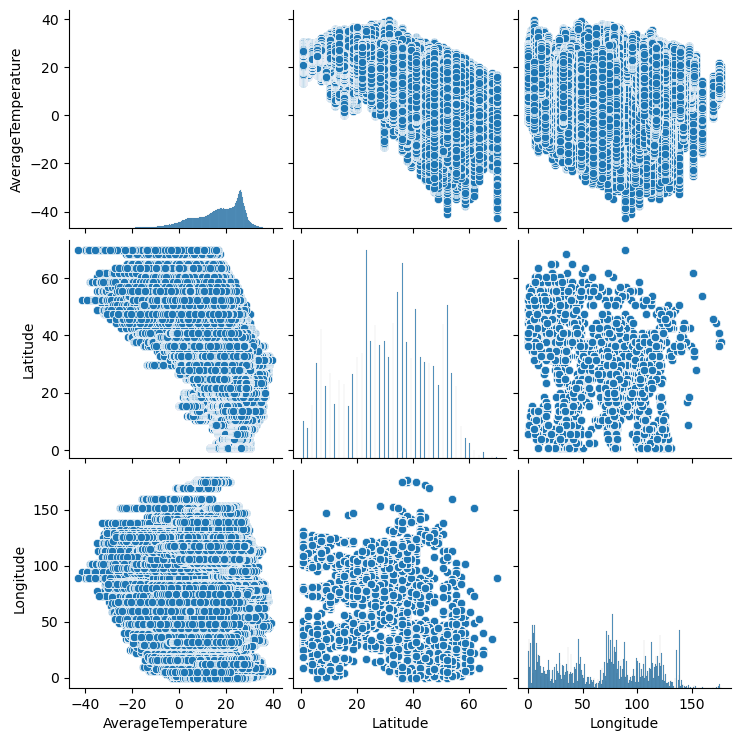

In [69]:
# Pairplot to analyze multiple relationships
sns.pairplot(df[['AverageTemperature', 'Latitude', 'Longitude']])
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_20688\2340694021.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AverageTemperature'], shade=True, color='brown')


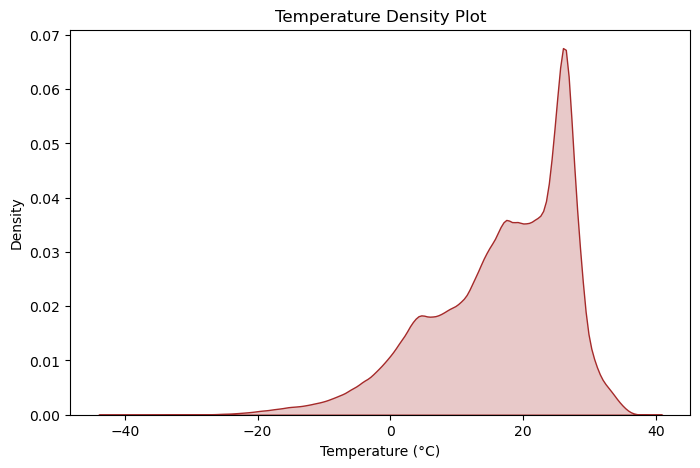

In [74]:
# KDE Plot for temperature distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df['AverageTemperature'], shade=True, color='brown')
plt.title("Temperature Density Plot")
plt.xlabel("Temperature (°C)")
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_20688\122591601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='AverageTemperature', data=df, palette='coolwarm')


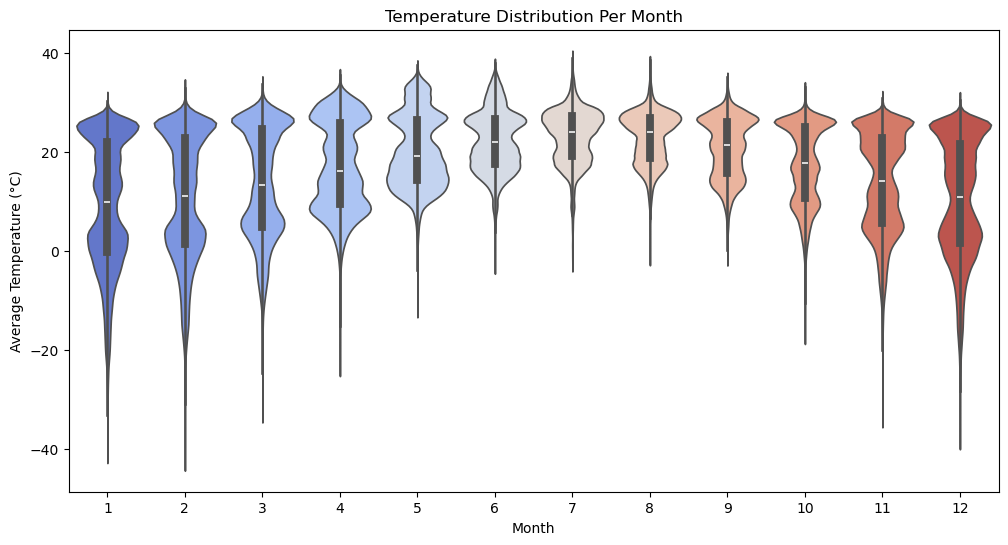

In [75]:
# Violin Plot for temperature distribution per month
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='AverageTemperature', data=df, palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Distribution Per Month")
plt.show()

In [ ]:
# Plotting world map with temperature data
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
world_map = folium.Map(location=map_center, zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

for index, row in df.iterrows():
    if not np.isnan(row['Latitude']) and not np.isnan(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['City']}: {row['AverageTemperature']}°C",
            icon=folium.Icon(color='red')
        ).add_to(marker_cluster)

world_map.save("climate_temperature_map.html")
print("World map with temperature data saved as climate_temperature_map.html")